##### The ultimate goal of spam detection is to protect you from unwanted messages, save your time and effort, and ensure that you only receive relevant and important communication. It acts as a filter, keeping your inbox clean and ensuring that you don't fall victim to scams or waste time dealing with irrelevant messages.

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
#dropping un necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Label Encoding
##### Label encoding is commonly used in machine learning tasks when dealing with categorical target variables. The target variable, also known as the dependent variable or response variable, is the variable that you want to predict or classify.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

##### The machine learning algorithm can now understand that 'ham' is represented by 0 and 'spam' is represented by 1.

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#cheking duplicated values
df.duplicated().sum()

403

In [11]:
#dropping duplicates value
print("before removing duplicates;",df.shape)
df.drop_duplicates(keep='first',inplace=True)
print("after removing duplicates",df.shape)

before removing duplicates; (5572, 2)
after removing duplicates (5169, 2)


<AxesSubplot:>

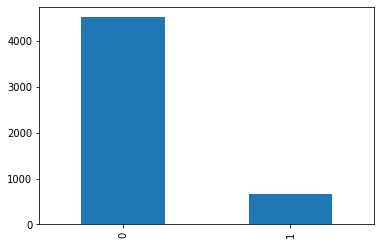

In [12]:
#Checking counts of Ham and spam
df['target'].value_counts().plot(kind='bar')

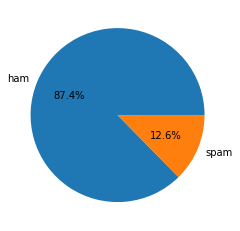

In [13]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

### Feature Engineering: Adding Text-related Columns for Character, Word, and Sentence Counts

In [14]:
import nltk

In [15]:
#num of characters
df['num_characters'] = df['text'].apply(len)
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
#overall(ham and spam)
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Conclusion : 
    spam messages tend to have higher average counts for characters, words, and sentences compared to the ham messages. 
    Additionally, the spam messages generally exhibit lower standard deviations, indicating less variability in the counts. 
    These differences suggest that spam messages are typically longer, contain more words, and have slightly more sentences 
    compared to ham messages

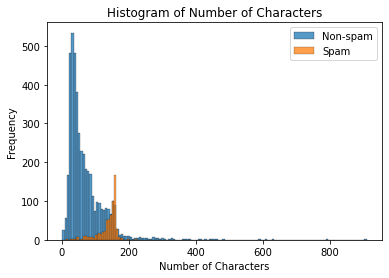

In [20]:
# Lets Visualize
# num_characters
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')

plt.legend()

plt.show()

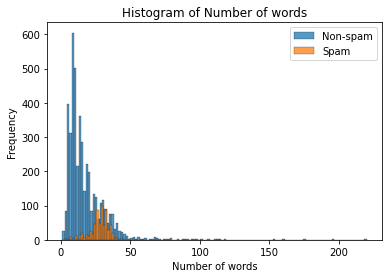

In [21]:
#num_words
sns.histplot(df[df['target'] == 0]['num_words'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam')

plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of words')

plt.legend()

plt.show()

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Create an empty list to store filtered words
    filtered_words = []
    
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)
        
     # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)
    
    # Return the transformed text
    return transformed_text

In [23]:
#Create a new column in the dataframe to store the transformed text
df['transformed_text'] = df['text'].apply(transform_text)

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word cloud

##### A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance in the given text. It helps to visually highlight the most common or significant words in a text document.

In [25]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white').generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

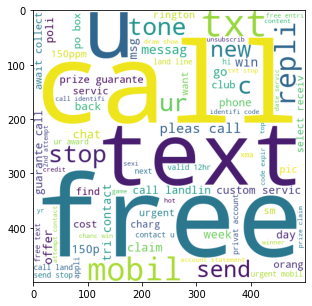

In [26]:
#generating Word cloud for only Spam words
plt.figure(figsize=(10,5))
plt.imshow(wc) 
plt.show()

In [27]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white').generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

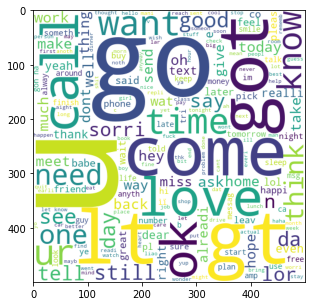

In [28]:
#generating Word cloud for only Spam words
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.show()

In [29]:
ham_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        ham_frequncy.append(word)

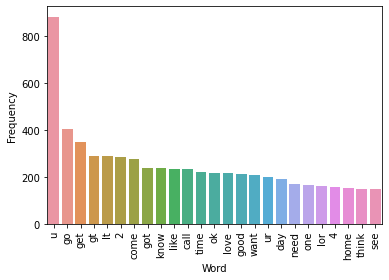

In [30]:
from collections import Counter
# Count the frequency of each word in the ham_frequncy list
word_frequency = Counter(ham_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [31]:
spam_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        spam_frequncy.append(word)

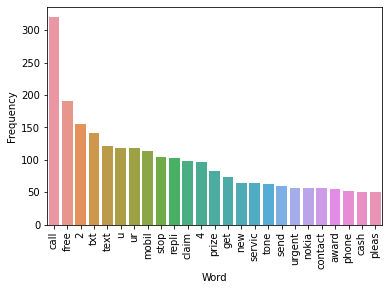

In [32]:
# Count the frequency of each word in the spam_frequncy list
word_frequency = Counter(spam_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words_spam = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common_spam = pd.DataFrame(most_common_words_spam, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common_spam, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

### Vectorization

##### we need to convert text into a numerical format that machines can process effectively. This is where vectorization comes into play

In [33]:
#we are taking most frequent 5000 words from the vocabulary 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [34]:
# Transform the text data into a numerical representation using CountVectorizer and convert it into a 2D array 
# Each row in X corresponds to a text sample, and each column represents a specific word or term from the vocabulary of the text 
# data. The values in the array indicate the frequency or presence of each word or term in the respective text sample
X = cv.fit_transform(df['transformed_text']).toarray()

##### fit_transform() method of the CountVectorizer, it transforms the text data into a numerical representation known as a sparse matrix. A sparse matrix only stores the non-zero elements, which is an efficient way to represent text data since most text samples will only contain a small subset of all possible words.

In [35]:
X.shape  # Each row corresponds to a text sample in the df['transformed_text'] data, and each column represents a specific word 
# or term from the vocabulary.

(5169, 6708)

In [36]:
# Extract the values from the 'target' column of the DataFrame and store them in variable 'y'
y = df['target'].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [39]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

In [44]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy_score: {accuracy_score(y_test,y_pred1)}")
print(f"confusion_matrix: \n{confusion_matrix(y_test,y_pred1)}")
print(f"precision_score: {precision_score(y_test,y_pred1)}")

Accuracy_score: 0.8800773694390716
confusion_matrix: 
[[792 104]
 [ 20 118]]
precision_score: 0.5315315315315315


In [46]:
# Multinomial Naive Bayes classifier
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy_score: {accuracy_score(y_test,y_pred2)}")
print(f"confusion_matrix: \n{confusion_matrix(y_test,y_pred2)}")
print(f"precision_score: {precision_score(y_test,y_pred2)}")

Accuracy_score: 0.9642166344294004
confusion_matrix: 
[[871  25]
 [ 12 126]]
precision_score: 0.8344370860927153


In [47]:
# Bernoulli Naive Bayes classifier
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy_score: {accuracy_score(y_test,y_pred3)}")
print(f"confusion_matrix: \n{confusion_matrix(y_test,y_pred3)}")
print(f"precision_score: {precision_score(y_test,y_pred3)}")

Accuracy_score: 0.9700193423597679
confusion_matrix: 
[[893   3]
 [ 28 110]]
precision_score: 0.9734513274336283


### Tf_IDF Vectorization
##### TF-IDF stands for "Term Frequency-Inverse Document Frequency." It is a numerical representation technique used for text data

In [48]:
# Lets implement Tf-Idf vectorizer on our text to check weather it is performed well as compared to BoW
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
# Perform TF-IDF vectorization on the 'transformed_text' column of the dataframe
X = tfidf.fit_transform(df['transformed_text']).toarray()
# Create a variable 'y' containing the values of the 'target' column
y = df['target'].values

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
# Gaussian Naive Bayes classifier
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy_score: {accuracy_score(y_test,y_pred1)}")
print(f"confusion_matrix: \n{confusion_matrix(y_test,y_pred1)}")
print(f"precision_score: {precision_score(y_test,y_pred1)}")

Accuracy_score: 0.8694390715667312
confusion_matrix: 
[[788 108]
 [ 27 111]]
precision_score: 0.5068493150684932


In [52]:
# Multinomial Naive Bayes classifier
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy_score: {accuracy_score(y_test,y_pred2)}")
print(f"confusion_matrix: \n{confusion_matrix(y_test,y_pred2)}")
print(f"precision_score: {precision_score(y_test,y_pred2)}")

Accuracy_score: 0.9709864603481625
confusion_matrix: 
[[896   0]
 [ 30 108]]
precision_score: 1.0


In [53]:
# Bernoulli Naive Bayes classifier
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy_score: {accuracy_score(y_test,y_pred3)}")
print(f"confusion_matrix: \n{confusion_matrix(y_test,y_pred3)}")
print(f"precision_score: {precision_score(y_test,y_pred3)}")

Accuracy_score: 0.9835589941972921
confusion_matrix: 
[[895   1]
 [ 16 122]]
precision_score: 0.991869918699187
